In [1]:
import pandas as pd
parse_dates_clicks = ["created"]
clicks = pd.read_csv('clicks.csv.gzip',  compression = 'gzip', parse_dates=parse_dates_clicks)
parse_dates_auctions = ["date"]
auctions = pd.read_csv('auctions.csv.gzip',  compression = 'gzip', parse_dates=parse_dates_auctions)
parse_dates_installs = ["created"]
installs = pd.read_csv('installs.csv.gzip',  compression = 'gzip', parse_dates=parse_dates_installs)
parse_dates_events = ["date"]
events = pd.read_csv('events.csv.gzip',  compression = 'gzip', parse_dates=parse_dates_events)

/home/lucas/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (12,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
clicks.head()

,advertiser_id,action_id,source_id,created,country_code,latitude,longitude,wifi_connection,carrier_id,trans_id,os_minor,agent_device,os_major,specs_brand,brand,timeToClick,touchX,touchY,ref_type,ref_hash
0,2,NaN,4,2019-03-06 22:42:12.755,6333597102633388268,1.205689,1.070234,False,1.0,iGgClCM9exiHF4K31g94XmvHEBSLKIY,6.768137e+18,NaN,3.072849e+18,2733035977666442898,NaN,1.563,0.905,0.078,1891515180541284343,1904083516767779093
1,0,NaN,0,2019-03-08 10:24:30.641,6333597102633388268,1.218924,1.071209,False,4.0,MMHTOJ6qKAOeIH_Eywh1KIcCaxtO9oM,3.025219e+18,NaN,1.774085e+18,392184377613098015,NaN,NaN,NaN,NaN,1891515180541284343,3086509764961796666
2,0,NaN,0,2019-03-08 15:24:16.069,6333597102633388268,1.205689,1.070234,False,6.0,vIrEIdf9izUaWdAri6Ezk7T3nHFvNQU,5.975656e+18,NaN,3.072849e+18,392184377613098015,NaN,NaN,0.946,0.473,1891515180541284343,6958163894863846647
3,2,NaN,3,2019-03-06 03:08:51.543,6333597102633388268,1.205689,1.070234,False,45.0,YaKxxEAs2UmZhSpRfiCO9Zpa82B_AKM,6.768137e+18,NaN,3.072849e+18,2733035977666442898,NaN,19.013,0.035,0.431,1891515180541284343,4368617728156436525
4,2,NaN,3,2019-03-06 03:32:55.570,6333597102633388268,1.205689,1.070234,False,45.0,X5XTOcYQovkl6yadYdAD7xioVGU9jiY,6.768137e+18,NaN,3.072849e+18,2733035977666442898,NaN,28.110,0.054,0.423,1891515180541284343,4368617728156436525


In [3]:
auctions.head()

,auction_type_id,country,date,device_id,platform,ref_type_id,source_id
0,NaN,6333597102633388268,2019-03-11 14:18:33.290763,6059599345986491085,1,1,0
1,NaN,6333597102633388268,2019-03-11 14:18:34.440157,1115994996230693426,1,1,0
2,NaN,6333597102633388268,2019-03-11 14:18:35.862360,7463856250762200923,1,1,0
3,NaN,6333597102633388268,2019-03-11 14:18:36.167163,7829815350267792040,1,1,0
4,NaN,6333597102633388268,2019-03-11 14:18:37.728590,1448534231953777480,1,1,0


In [4]:
installs.head()

,created,application_id,ref_type,ref_hash,click_hash,attributed,implicit,device_countrycode,device_brand,device_model,session_user_agent,user_agent,event_uuid,kind,wifi,trans_id,ip_address,device_language
0,2019-03-13 01:43:33.445,0,1891515180541284343,8464844987297247076,NaN,False,False,6333597102633388268,3.083059e+17,4.445252e+18,NaN,NaN,NaN,NaN,NaN,NaN,5529284367937637301,NaN
1,2019-03-13 04:58:35.078,0,1891515180541284343,3250564871270161533,NaN,False,False,6333597102633388268,3.083059e+17,4.445252e+18,NaN,NaN,NaN,NaN,NaN,NaN,6098022721363533304,NaN
2,2019-03-13 04:20:57.666,0,1891515180541284343,7953318831018100268,NaN,False,True,6333597102633388268,5.137992e+17,6.026543e+18,HasOffers Mobile AppTracking v1.0,NaN,0bfa9b4c-e07a-4522-b32d-138e3165ac98,Open,NaN,NaN,4636407223847323867,3.301378e+18
3,2019-03-13 04:20:57.698,0,1891515180541284343,7953318831018100268,NaN,False,False,6333597102633388268,5.137992e+17,6.026543e+18,NaN,NaN,NaN,NaN,NaN,NaN,4636407223847323867,NaN
4,2019-03-10 22:24:56.684,0,1891515180541284343,8355110941557237501,NaN,False,True,6333597102633388268,1.083369e+18,7.876612e+18,HasOffers Mobile AppTracking v1.0,NaN,8f235a8c-41bf-4399-b33d-c41577c949b0,Open,NaN,NaN,685400811232710215,3.301378e+18


In [5]:
events.head()

,date,event_id,ref_type,ref_hash,application_id,attributed,device_countrycode,device_os_version,device_brand,device_model,...,trans_id,user_agent,event_uuid,carrier,kind,device_os,wifi,connection_type,ip_address,device_language
0,2019-03-05 00:09:36.966,0,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703e+17,NaN,5.990117e+18,...,NaN,NaN,a9c0b263-acb2-4577-92c5-cbde5d7a5db1,2.248157e+17,5.516623e+18,7.531669e+18,NaN,Cable/DSL,7858558567428669000,4.077062e+17
1,2019-03-05 00:09:38.920,1,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703e+17,NaN,5.990117e+18,...,NaN,NaN,1cd98205-0d97-4ec2-a019-667997dbfe7a,2.248157e+17,9.977660e+17,7.531669e+18,NaN,Cable/DSL,7858558567428669000,4.077062e+17
2,2019-03-05 00:09:26.195,0,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703e+17,NaN,5.990117e+18,...,NaN,NaN,f02e2924-21ae-492b-b625-9021ae0a4eca,2.248157e+17,5.516623e+18,7.531669e+18,NaN,Cable/DSL,7858558567428669000,4.077062e+17
3,2019-03-05 00:09:31.107,2,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703e+17,NaN,5.990117e+18,...,NaN,NaN,a813cf45-a36e-4668-85e2-5395f1564e98,2.248157e+17,8.561153e+18,7.531669e+18,NaN,Cable/DSL,6324037615828123965,4.077062e+17
4,2019-03-09 21:00:36.585,3,1891515180541284343,2635154697734164782,38,False,6333597102633388268,7.391844e+18,NaN,5.960896e+18,...,NaN,NaN,63a4f0aa-e147-469f-8c55-4ca4f8d0e310,2.248157e+17,8.731902e+17,7.531669e+18,NaN,Cable/DSL,2894495631302821483,3.301378e+18


In [6]:
clicks["created"] = pd.to_datetime(clicks["created"], utc=True)

In [7]:
clicks["created"] = clicks["created"].dt.tz_convert("America/Buenos_Aires")

In [8]:
clicks.groupby(["advertiser_id"]).agg({'advertiser_id': ['count'], "timeToClick": ["mean"]})

,advertiser_id,timeToClick
,count,mean
advertiser_id,,
0,70,96.463000
1,2,NaN
2,12,38.733000
3,26263,230.505929
5,1,NaN
7,2,NaN
8,1,0.695000


In [9]:
clicks.groupby(["advertiser_id"]).agg({'timeToClick': ['mean', 'sum', 'count']})

timeToClick                    
                     mean          sum  count
advertiser_id                                
0               96.463000      289.389      3
1                     NaN        0.000      0
2               38.733000      348.597      9
3              230.505929  5293338.161  22964
5                     NaN        0.000      0
7                     NaN        0.000      0
8                0.695000        0.695      1

In [10]:
clicks['created'] = pd.to_datetime(clicks['created']).dt.floor('30T').dt.time

In [11]:
clicks.head()

,advertiser_id,action_id,source_id,created,country_code,latitude,longitude,wifi_connection,carrier_id,trans_id,os_minor,agent_device,os_major,specs_brand,brand,timeToClick,touchX,touchY,ref_type,ref_hash
0,2,NaN,4,19:30:00,6333597102633388268,1.205689,1.070234,False,1.0,iGgClCM9exiHF4K31g94XmvHEBSLKIY,6.768137e+18,NaN,3.072849e+18,2733035977666442898,NaN,1.563,0.905,0.078,1891515180541284343,1904083516767779093
1,0,NaN,0,07:00:00,6333597102633388268,1.218924,1.071209,False,4.0,MMHTOJ6qKAOeIH_Eywh1KIcCaxtO9oM,3.025219e+18,NaN,1.774085e+18,392184377613098015,NaN,NaN,NaN,NaN,1891515180541284343,3086509764961796666
2,0,NaN,0,12:00:00,6333597102633388268,1.205689,1.070234,False,6.0,vIrEIdf9izUaWdAri6Ezk7T3nHFvNQU,5.975656e+18,NaN,3.072849e+18,392184377613098015,NaN,NaN,0.946,0.473,1891515180541284343,6958163894863846647
3,2,NaN,3,00:00:00,6333597102633388268,1.205689,1.070234,False,45.0,YaKxxEAs2UmZhSpRfiCO9Zpa82B_AKM,6.768137e+18,NaN,3.072849e+18,2733035977666442898,NaN,19.013,0.035,0.431,1891515180541284343,4368617728156436525
4,2,NaN,3,00:30:00,6333597102633388268,1.205689,1.070234,False,45.0,X5XTOcYQovkl6yadYdAD7xioVGU9jiY,6.768137e+18,NaN,3.072849e+18,2733035977666442898,NaN,28.110,0.054,0.423,1891515180541284343,4368617728156436525


In [12]:
clicksIn30MinutesPeriods = clicks.groupby(["created"])["created"].count()

In [13]:
clicksIn30MinutesPeriodDF = pd.DataFrame({'createdTime':clicksIn30MinutesPeriods.index, 'count':clicksIn30MinutesPeriods.values})

In [14]:
clicksIn30MinutesPeriodDF.head()

,createdTime,count
0,00:00:00,343
1,00:30:00,411
2,01:00:00,527
3,01:30:00,552
4,02:00:00,470


In [15]:
clicksIn30MinutesPeriodDF["createdTime"] = clicksIn30MinutesPeriodDF["createdTime"].apply(lambda t: t.strftime('%H:%M'))

In [16]:
clicksIn30MinutesPeriodDF.plot.line(x='createdTime', y='count', rot=0)

In [17]:
auctions["date"] = pd.to_datetime(auctions["date"], utc=True)

In [18]:
auctions["date"] = auctions["date"].dt.tz_convert("America/Buenos_Aires")

In [19]:
auctions['date'] = pd.to_datetime(auctions['date']).dt.floor('30T').dt.time

In [20]:
auctionsIn30MinutesPeriods = auctions.groupby(["date"])["date"].count()

In [21]:
auctionsIn30MinutesPeriodDF = pd.DataFrame({'createdTime':auctionsIn30MinutesPeriods.index, 'count':auctionsIn30MinutesPeriods.values})

In [22]:
auctionsIn30MinutesPeriodDF["createdTime"] = auctionsIn30MinutesPeriodDF["createdTime"].apply(lambda t: t.strftime('%H:%M'))

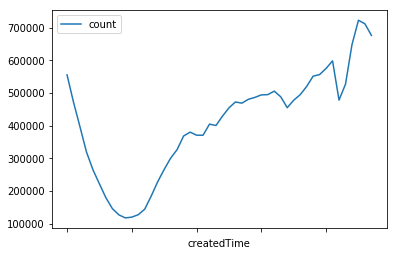

In [23]:
auctionsIn30MinutesPeriodDF.plot.line(x='createdTime', y='count', rot=90)

In [24]:
installs["created"] = pd.to_datetime(installs["created"], utc=True)

In [25]:
installs["created"] = installs["created"].dt.tz_convert("America/Buenos_Aires")

In [26]:
installs["created"] = pd.to_datetime(installs["created"]).dt.floor('30T').dt.time

In [27]:
installsIn30MinutesPeriods = installs.groupby(["created"])["created"].count()

In [28]:
installsIn30MinutesPeriodDF = pd.DataFrame({'createdTime':installsIn30MinutesPeriods.index, 'count':installsIn30MinutesPeriods.values})

In [29]:
installsIn30MinutesPeriodDF["createdTime"] = installsIn30MinutesPeriodDF["createdTime"].apply(lambda t: t.strftime('%H:%M'))

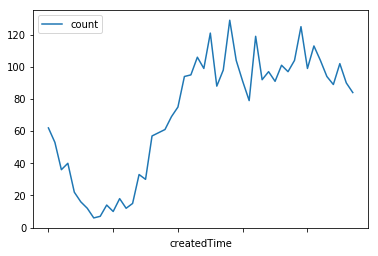

In [30]:
installsIn30MinutesPeriodDF.plot.line(x='createdTime', y='count', rot=90)

In [31]:
#Normalize to 20 range installs
installsIn30MinutesPeriodDF["count"]=((installsIn30MinutesPeriodDF["count"]-installsIn30MinutesPeriodDF["count"].min())/(installsIn30MinutesPeriodDF["count"].max()-installsIn30MinutesPeriodDF["count"].min()))*20

In [32]:
#Normalize to 20 range auctions
auctionsIn30MinutesPeriodDF["count"]=((auctionsIn30MinutesPeriodDF["count"]-auctionsIn30MinutesPeriodDF["count"].min())/(auctionsIn30MinutesPeriodDF["count"].max()-auctionsIn30MinutesPeriodDF["count"].min()))*20

In [33]:
#Normalize to 20 range clicks
clicksIn30MinutesPeriodDF["count"]=((clicksIn30MinutesPeriodDF["count"]-clicksIn30MinutesPeriodDF["count"].min())/(clicksIn30MinutesPeriodDF["count"].max()-clicksIn30MinutesPeriodDF["count"].min()))*20

In [34]:
import matplotlib.pyplot as plt

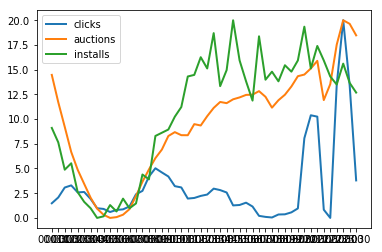

In [35]:
plt.plot( 'createdTime', 'count', data=clicksIn30MinutesPeriodDF, marker='', linewidth=2, label="clicks")
plt.plot( 'createdTime', 'count', data=auctionsIn30MinutesPeriodDF, marker='', linewidth=2, label="auctions")
plt.plot( 'createdTime', 'count', data=installsIn30MinutesPeriodDF, marker='', linewidth=2, label="installs")
plt.legend()

In [36]:
#Es importante que la brecha entre clicks y auctions sea baja para que rinda más el dinero invertido